In [15]:
#import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#import year data in a dataframe
year_path = os.path.join('..', 'airline data', 'airline_totaled_yearly.csv')
years_df = pd.read_csv(year_path)

In [17]:
years_df.head()

,Year,Europe,Caribbean,Asia,South America,Central America,Oceania,Middle East,Africa,Mexico,Canada
0,1996,8946300,4020600,3155100,1455500,1045600,591800,433800,137600,3992400,3047200
1,1997,10099400,4108100,3399500,1681500,1094300,611500,449800,178000,4343300,3192400
2,1998,10995500,4170500,3459600,1824300,1323800,667600,432200,196200,4442600,3622800
3,1999,11665800,4533500,3635600,1812800,1495000,814600,445100,205000,4788600,3806700
4,2000,12774176,4585966,3859533,1806876,1524305,831619,447328,222480,4754169,3871893


In [18]:
years_df.dtypes

Year               int64
Europe             int64
Caribbean          int64
Asia               int64
South America      int64
Central America    int64
Oceania            int64
Middle East        int64
Africa             int64
Mexico             int64
Canada             int64
dtype: object

In [19]:
#get a color pallette to automatically select colors
color_pallette = plt.get_cmap('Paired')

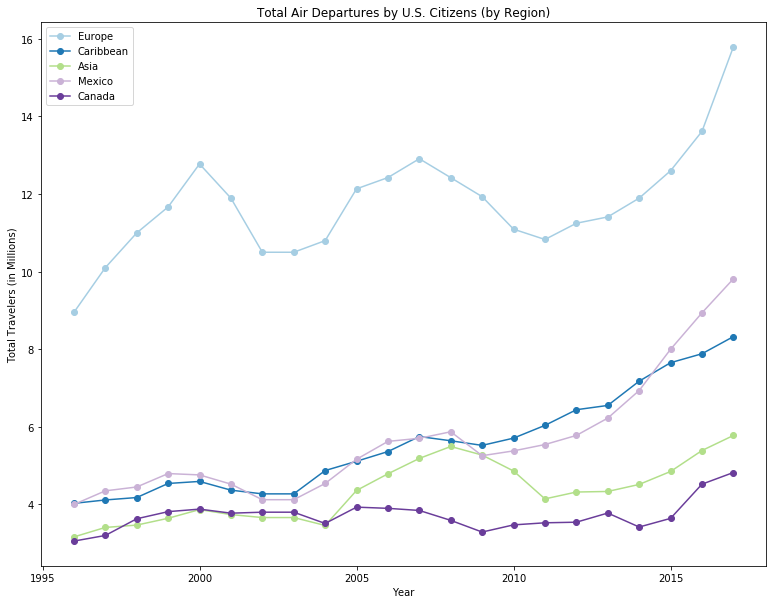

In [20]:
small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot yearly totals by region
plt.figure(figsize = (13, 10))

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column not in small_amounts:
        plt.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#plot a legend
plt.legend(loc = 'best')

#plot title and axis labels
plt.title('Total Air Departures by U.S. Citizens (by Region)')
plt.xlabel('Year')
plt.ylabel('Total Travelers (in Millions)')

#save figure
output_path = os.path.join('..', 'images', 'yearly_total_regions_all.png')
plt.savefig(output_path)

#show figure
plt.show()

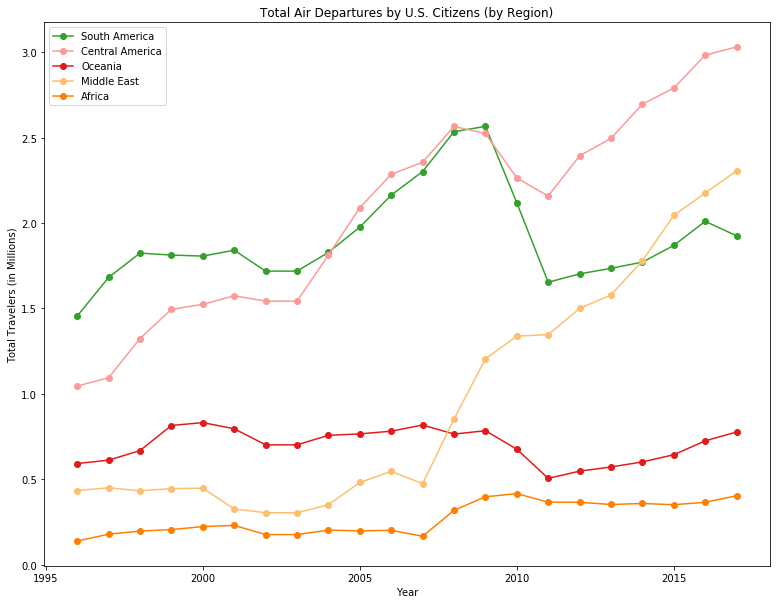

In [53]:
#do this again, but for lesser traveled regions (note we do a bit more steps to make the same colors)
small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot yearly totals by region
plt.figure(figsize = (13, 10))

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    #plot if in list
    if column in small_amounts:
        plt.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#plot a legend
plt.legend(loc = 'best')

#plot title and axis labels
plt.title('Total Air Departures by U.S. Citizens (by Region)')
plt.xlabel('Year')
plt.ylabel('Total Travelers (in Millions)')

#save figure
output_path = os.path.join('..', 'images', 'yearly_total_regions_small.png')
plt.savefig(output_path)

#show figure
plt.show()

In [26]:
#read in unemployment data
unemp_path = os.path.join('..', 'economic data', 'unemployment_avg_yearly.csv')

unemp_df = pd.read_csv(unemp_path)

unemp_df.head()

,Year,Unemployment Rate
0,1996,5.408333
1,1997,4.941667
2,1998,4.500000
3,1999,4.216667
4,2000,3.966667


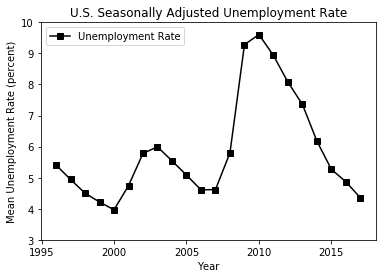

In [54]:
#plot unemployment data
unemp_df.plot('Year', 'Unemployment Rate', c = 'k', style = 's-')

#add title and labels
plt.xlabel('Year')
plt.ylabel('Mean Unemployment Rate (percent)')
plt.title('U.S. Seasonally Adjusted Unemployment Rate')

#set scale
plt.ylim(3, 10)

#save figure
output_path = os.path.join('..', 'images', 'unemployment_yearly.png')
plt.savefig(output_path)

#show figure
plt.show()

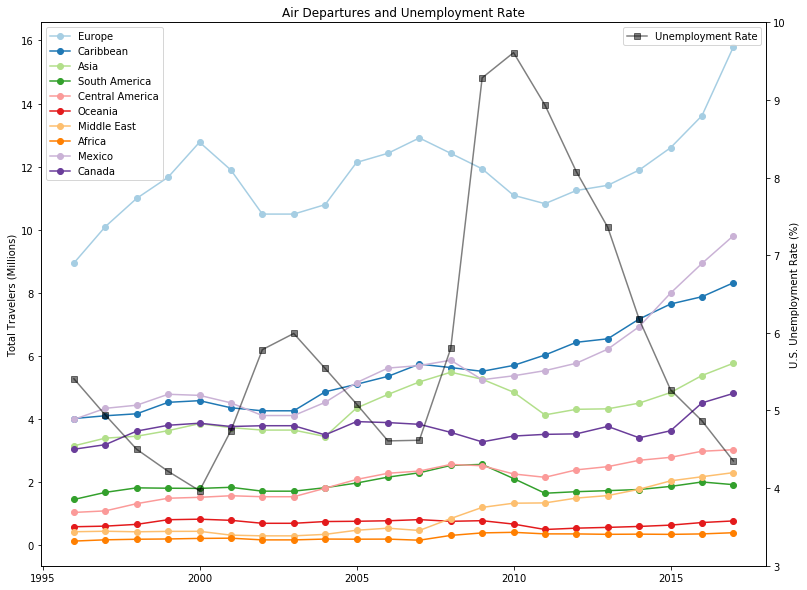

In [55]:
#combine two sets of data to one plot
#plot yearly totals by region
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1): 
    ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
             color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's-', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate')

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'best')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate')
plt.xlabel('Year')
ax.set_ylabel('Total Travelers (Millions)')
ax2.set_ylabel('U.S. Unemployment Rate (%)')

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment.png')
plt.savefig(output_path)

#show figure
plt.show()

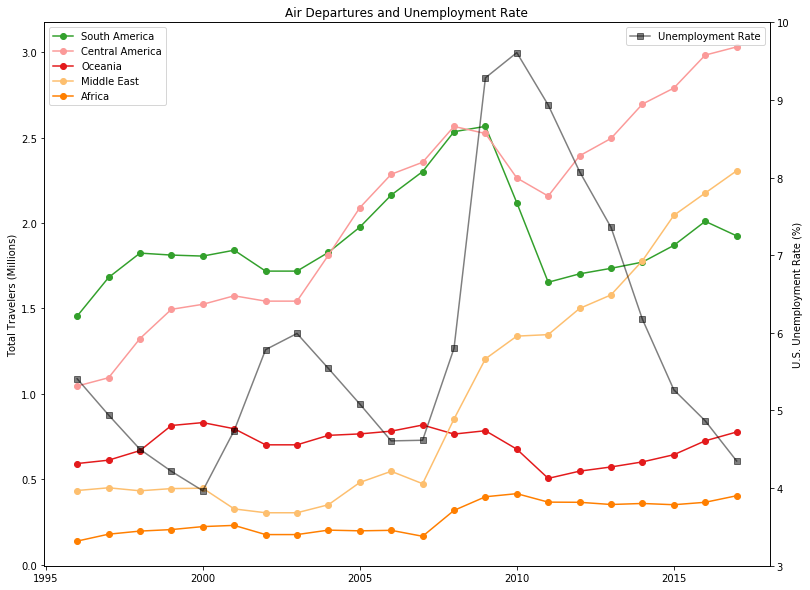

In [56]:
#do same for less traveled destinations
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's-', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate')

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'best')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate')
plt.xlabel('Year')
ax.set_ylabel('Total Travelers (Millions)')
ax2.set_ylabel('U.S. Unemployment Rate (%)')

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment_small.png')
plt.savefig(output_path)

#show figure
plt.show()

In [3]:
#plot transpo totals
transpo_path = os.path.join('..', 'Transpo Data', 'Transpo_data_yearly.csv')

#read in data frame
transpo_df = pd.read_csv(transpo_path)

In [4]:
#look at data frame for columns
transpo_df.head()

,Year,Total U.S. Travel and Tourism,Travel,Passenger fares
0,1996.0,90231.0,69809.0,20422.0
1,1997.0,94294.0,73426.0,20868.0
2,1998.0,91423.0,71325.0,20098.0
3,1999.0,94875.0,75450.0,19425.0
4,2000.0,102560.0,82363.0,20197.0


In [5]:
#make year an integer
transpo_df['Year'] = transpo_df['Year'].astype('int64')

In [8]:
#print columns
cols = transpo_df.columns
print(cols)

Index(['Year', 'Total U.S. Travel and Tourism', '      Travel',
       '      Passenger fares'],
      dtype='object')


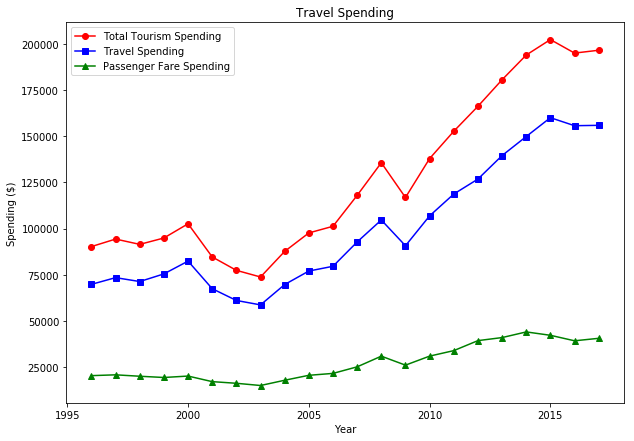

In [12]:
#plot all three columns
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
ax.plot(transpo_df['Year'], transpo_df['Total U.S. Travel and Tourism'], 'o-r', label = 'Total Tourism Spending')
ax.plot(transpo_df['Year'], transpo_df[cols[2]], 's-b', label = 'Travel Spending')
ax.plot(transpo_df['Year'], transpo_df[cols[3]], '^-g', label = 'Passenger Fare Spending')

#legend
plt.legend(loc = 'best')

#labels
plt.title('Travel Spending')
plt.xlabel('Year')
plt.ylabel('Spending ($)')

#save figure
output_path = os.path.join('..', 'images', 'travel_spending.png')
plt.savefig(output_path)

#show figure
plt.show()

In [17]:
#read in flight totals for domestic and total
domestic_df = pd.read_csv(os.path.join('..', 'airline data', 'domestic_total_airline_travel.csv'))
domestic_df = domestic_df.dropna()
domestic_df

,Year,Total,Domestic
0,2003.0,704.1,583.3
1,2004.0,767.2,629.8
2,2005.0,804.4,657.3
3,2006.0,811.7,658.4
4,2007.0,838.5,679.2
5,2008.0,812.7,651.7
6,2009.0,770.6,618.1
7,2010.0,790.2,629.5
8,2011.0,804.6,638.2
9,2012.0,815.5,642.3


In [18]:
#convert year to integer
domestic_df['Year'] = domestic_df['Year'].astype('int64')

#add international
domestic_df['International'] = domestic_df['Total'] - domestic_df['Domestic']

domestic_df.head()

,Year,Total,Domestic,International
0,2003,704.1,583.3,120.8
1,2004,767.2,629.8,137.4
2,2005,804.4,657.3,147.1
3,2006,811.7,658.4,153.3
4,2007,838.5,679.2,159.3


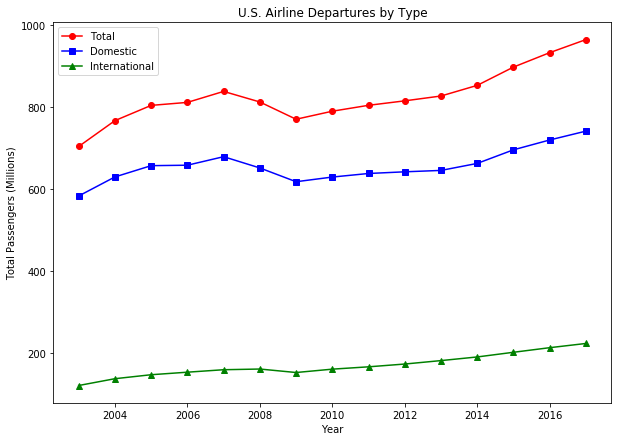

In [19]:
#graph data
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111)
ax.plot(domestic_df['Year'], domestic_df['Total'], 'o-r', label = 'Total')
ax.plot(domestic_df['Year'], domestic_df['Domestic'], 's-b', label = 'Domestic')
ax.plot(domestic_df['Year'], domestic_df['International'], '^-g', label = 'International')

#legend
plt.legend(loc = 'best')

#labels
plt.title('U.S. Airline Departures by Type')
plt.xlabel('Year')
plt.ylabel('Total Passengers (Millions)')

#save figure
output_path = os.path.join('..', 'images', 'travel_destination.png')
plt.savefig(output_path)

#show figure
plt.show()

In [2]:
#load the months data frame
months_path = os.path.join('..', 'airline data', 'airline_data_monthly.csv')
months_df = pd.read_csv(months_path)
months_df.head()

,Month,Europe,Caribbean,Asia,South America,Central America,Oceania,Middle East,Africa,Mexico,Canada
0,January,14106866,8898811,8058539,3467020,3730921,1351424,1622638,432112,9700398,4128360
1,February,12707625,9450559,6634527,3346380,3691913,1449233,1362145,376268,9846754,4436806
2,March,19911075,11525989,8345117,3648778,4597174,1395497,1662361,494929,12022919,5180876
3,April,19396659,10669280,7668833,2959676,3498289,1090113,1569197,429700,10247006,5310516
4,May,26987981,10312719,8363550,3217258,3448322,1083107,1859426,526423,10061691,6855712


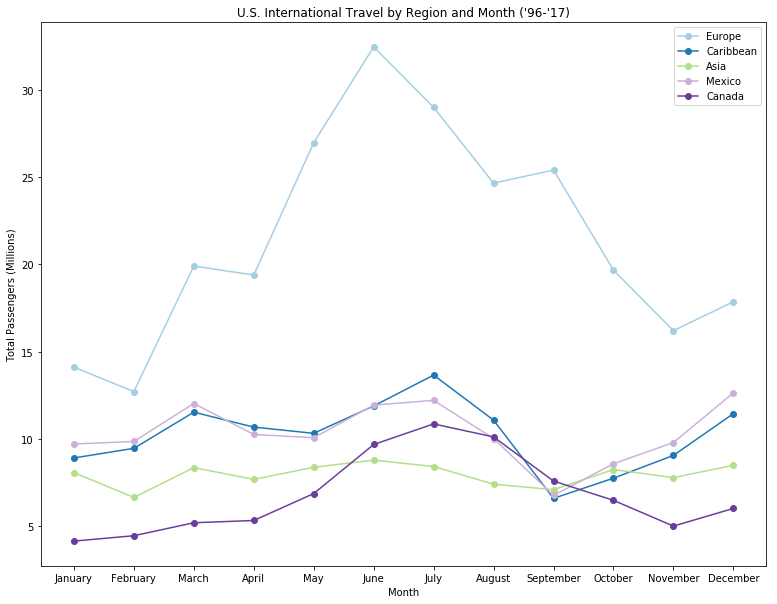

In [21]:
#plot a figure
fig = plt.figure(figsize = (13, 10))

#add a subfigure
ax = fig.add_subplot(111)

#get an x-axis and labels
x_axis = np.arange(0, len(months_df))
x_labels = months_df['Month'].tolist()

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot each column
color_idx = 0
for column in months_df.drop('Month', axis = 1):
    if column not in small_amounts:
        ax.plot(x_axis, months_df[column]/1000000, marker = 'o', color = color_pallette(color_idx), label = column)
    color_idx += 1

#add x-ticks
ax.set_xticks(x_axis)
ax.set_xticklabels(x_labels)

#add title and labels
ax.set_title("U.S. International Travel by Region and Month ('96-'17)")
ax.set_xlabel('Month')
ax.set_ylabel('Total Passengers (Millions)')

#add a legend
ax.legend(loc = 'best')

#save figure
output_path = os.path.join('..', 'images', 'monthly_travel_by_region.png')
plt.savefig(output_path)

#show plot
plt.show()

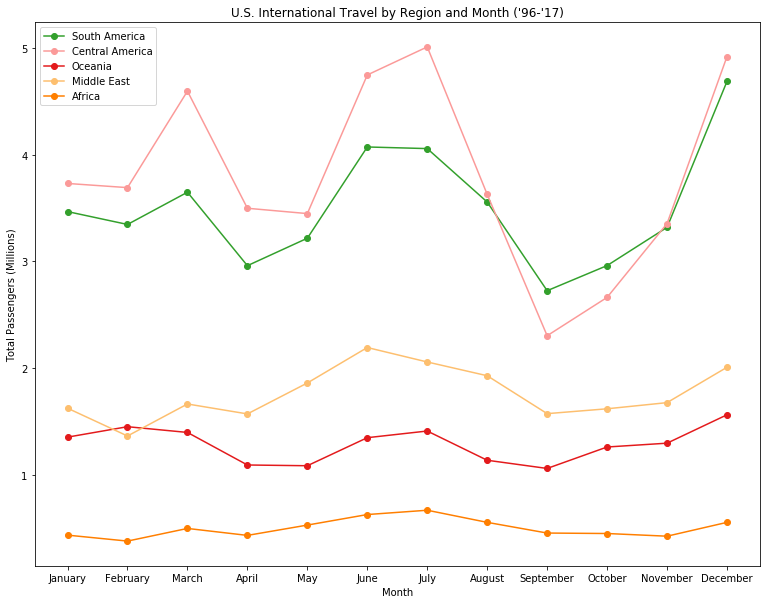

In [12]:
#do above for less traveled regions
small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#plot a figure
fig = plt.figure(figsize = (13, 10))

#add a subfigure
ax = fig.add_subplot(111)

#get an x-axis and labels
x_axis = np.arange(0, len(months_df))
x_labels = months_df['Month'].tolist()

#plot each column
color_idx = 0
for column in months_df.drop('Month', axis = 1):
    if column in small_amounts:
        ax.plot(x_axis, months_df[column]/1000000, marker = 'o', color = color_pallette(color_idx), label = column)
    color_idx += 1

#add x-ticks
ax.set_xticks(x_axis)
ax.set_xticklabels(x_labels)

#add title and labels
ax.set_title("U.S. International Travel by Region and Month ('96-'17)")
ax.set_xlabel('Month')
ax.set_ylabel('Total Passengers (Millions)')

#add a legend
ax.legend(loc = 'best')

#save figure
output_path = os.path.join('..', 'images', 'monthly_travel_by_region_small.png')
plt.savefig(output_path)

#show plot
plt.show()

In [23]:
airline_all_path = os.path.join('..', 'airline data', 'airport_data_cleaned.csv')
all_data_df = pd.read_csv(airline_all_path)
all_data_df.head()

,Region,January 1996,February 1996,March 1996,April 1996,May 1996,June 1996,July 1996,August 1996,September 1996,...,March 2017,April 2017,May 2017,June 2017,July 2017,August 2017,September 2017,October 2017,November 2017,December 2017
0,Europe,500100.0,490100.0,710600.0,645100.0,918100.0,1005000.0,984000.0,894900.0,885800.0,...,1064429,1212898,1684659,2139814,1867812,1627172,1676165,1201375,928855,1068009
1,Caribbean,312800.0,341100.0,357700.0,343300.0,325900.0,348000.0,409700.0,381800.0,244900.0,...,822751,783076,714117,865847,959510,718092,356693,473086,567498,754622
2,Asia,259600.0,222600.0,266400.0,243400.0,293100.0,282500.0,271300.0,268500.0,247500.0,...,513034,495884,477954,525875,504326,419586,420099,504961,507576,537118
3,South America,117900.0,116700.0,118000.0,98700.0,104500.0,129900.0,145900.0,137900.0,102600.0,...,165836,148540,154436,193673,182796,161435,119148,137624,157642,222500
4,Central America,85600.0,86300.0,100900.0,78100.0,75500.0,98100.0,107700.0,90400.0,58700.0,...,310182,252392,232366,336150,332634,222045,147044,169255,216656,319918


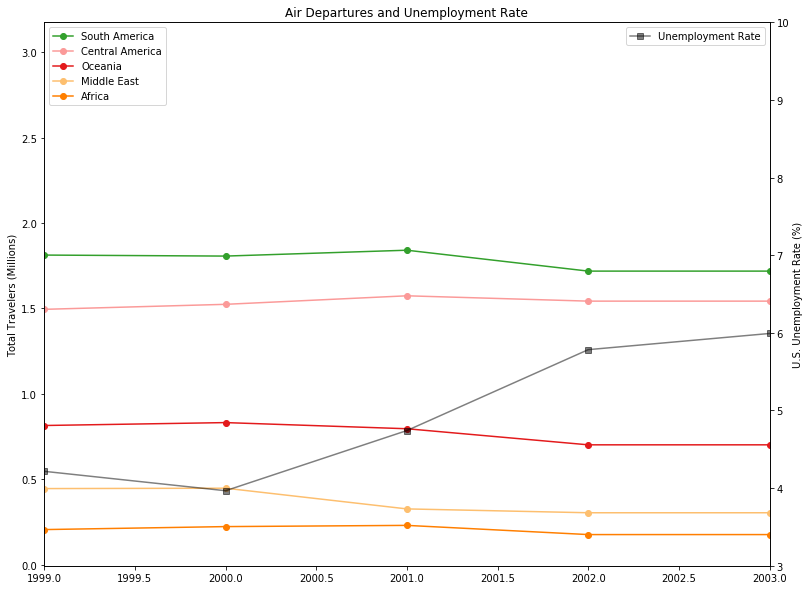

In [30]:
#do same for less traveled destinations
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 1999-2003
ax.set_xlim(1999, 2003)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's-', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate')

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate')
plt.xlabel('Year')
ax.set_ylabel('Total Travelers (Millions)')
ax2.set_ylabel('U.S. Unemployment Rate (%)')

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment_small.png')
plt.savefig(output_path)

#show figure
plt.show()

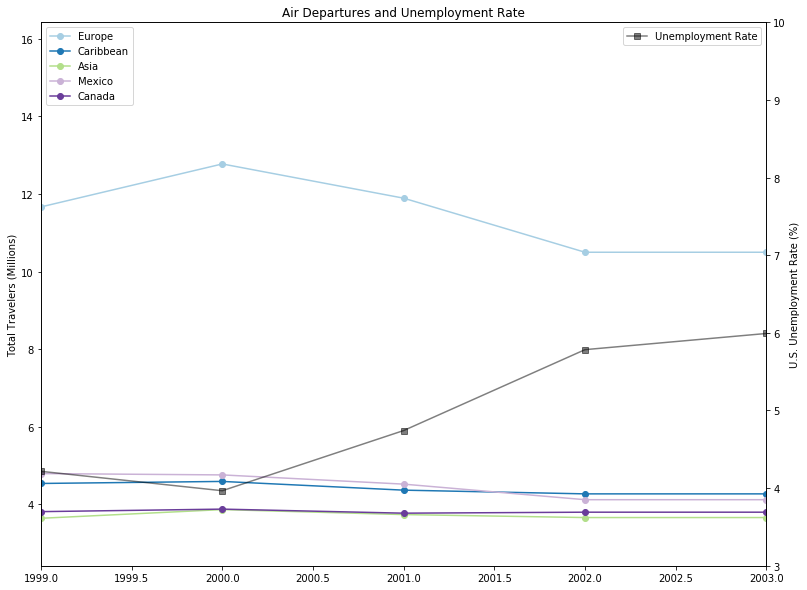

In [33]:
#do same for less traveled destinations
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column not in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 1999 to 2003
ax.set_xlim(1999, 2003)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's-', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate')

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate')
plt.xlabel('Year')
ax.set_ylabel('Total Travelers (Millions)')
ax2.set_ylabel('U.S. Unemployment Rate (%)')

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment_small.png')
plt.savefig(output_path)

#show figure
plt.show()

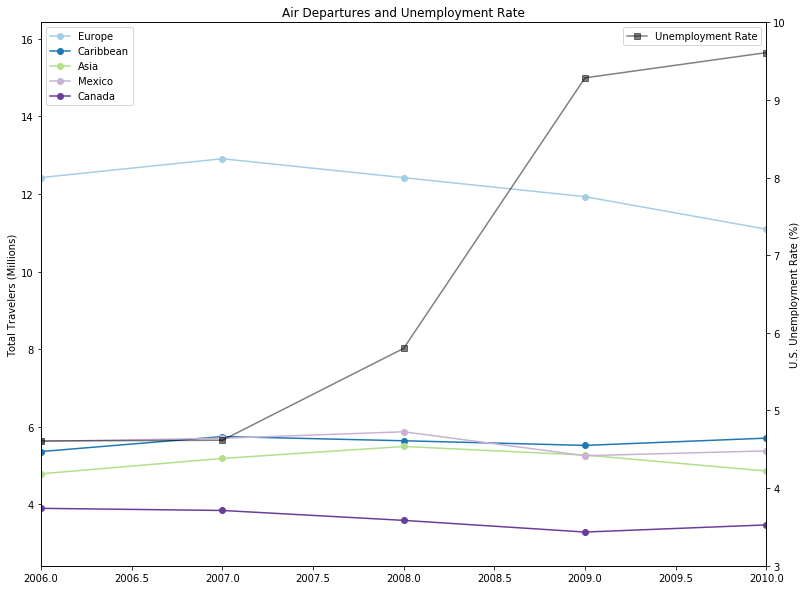

In [34]:
#do same for less traveled destinations
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column not in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 2006 to 2010
ax.set_xlim(2006, 2010)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's-', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate')

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate')
plt.xlabel('Year')
ax.set_ylabel('Total Travelers (Millions)')
ax2.set_ylabel('U.S. Unemployment Rate (%)')

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment_small.png')
plt.savefig(output_path)

#show figure
plt.show()

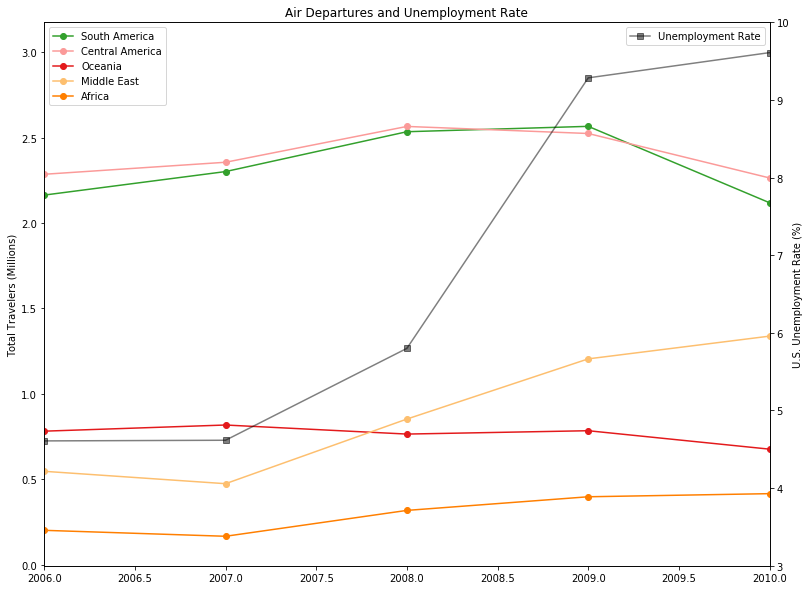

In [35]:
#do same for less traveled destinations
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)

small_amounts = ['Central America', 'South America', 'Middle East', 'Africa', 'Oceania']

#start with a number to select the color
color_idx = 0
#cycle through columns
for column in years_df.drop('Year', axis = 1):
    if column in small_amounts:
        ax.plot(years_df['Year'], years_df[column]/1000000, marker = 'o', 
                 color = color_pallette(color_idx), label = column)
    color_idx += 1
    
#set limit to 2006 to 2010
ax.set_xlim(2006, 2010)
    
#add unemployment data on a secondary y-axis
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], 's-', color = 'k', 
         alpha = 0.5, label = 'Unemployment Rate')

#set limit
ax2.set_ylim(3, 10)

#plot a legend
ax.legend(loc = 'upper left')
ax2.legend(loc = 'best')

#plot title and axis labels
plt.title('Air Departures and Unemployment Rate')
plt.xlabel('Year')
ax.set_ylabel('Total Travelers (Millions)')
ax2.set_ylabel('U.S. Unemployment Rate (%)')

#save figure
output_path = os.path.join('..', 'images', 'departures_and_unemployment_small.png')
plt.savefig(output_path)

#show figure
plt.show()

In [40]:
changes = 100*(years_df.iloc[-1, 1:] - years_df.iloc[0, 1:])/years_df.iloc[0, 1:]
changes

Europe              76.528498
Caribbean          106.947122
Asia                82.906722
South America       32.277568
Central America    189.977238
Oceania             31.209192
Middle East        431.658368
Africa             192.987645
Mexico             145.734721
Canada              58.041153
dtype: float64

In [42]:
total_change = 100*(years_df.iloc[-1, 1:].sum() - years_df.iloc[0, 1:].sum())/years_df.iloc[0, 1:].sum()
total_change

97.3987862476189

In [43]:
years_df.iloc[-1, 1:].sum()

52954001

In [44]:
years_df.iloc[0, 1:].sum()

26825900

([<matplotlib.axis.XTick at 0x1206a0a20>,
 <a list of 10 Text xticklabel objects>)

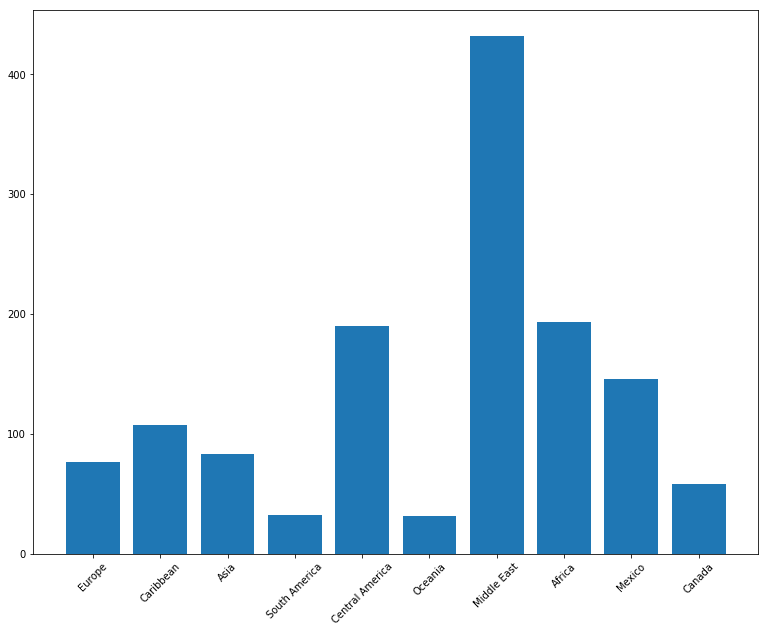

In [49]:
plt.figure(figsize = (13, 10))
x_axis = np.arange(0, len(changes))
plt.bar(x_axis, changes)
plt.xticks(x_axis, years_df.columns[1:], rotation = 45)

In [54]:
totals = years_df.iloc[:, 1:].sum(axis = 1).tolist()
total_df = pd.DataFrame({'Year': years_df['Year'], 'Total': totals})
total_df.head()

,Year,Total
0,1996,26825900
1,1997,29157800
2,1998,31135100
3,1999,33202700
4,2000,34678345


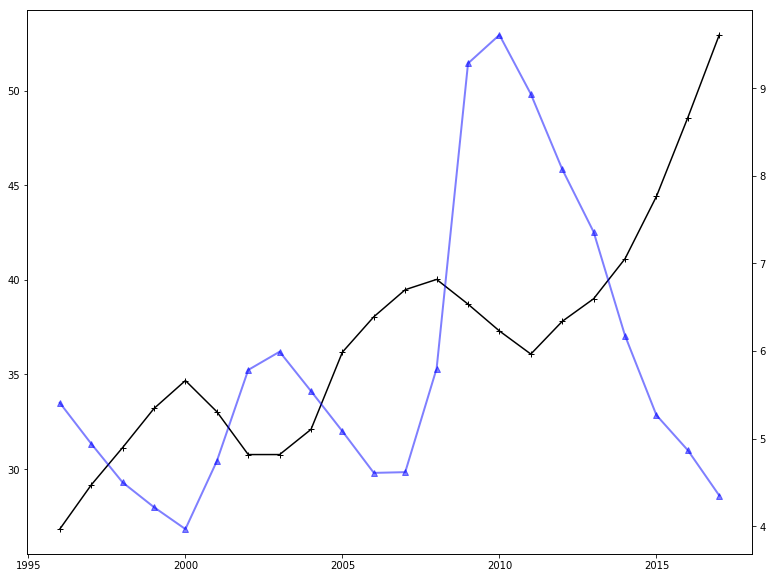

In [57]:
fig = plt.figure(figsize = (13, 10))
ax = fig.add_subplot(111)
ax.plot(total_df['Year'], total_df['Total']/1000000, '+-k')
ax2 = ax.twinx()
ax2.plot(unemp_df['Year'], unemp_df['Unemployment Rate'], '^-b', linewidth = 2, alpha = 0.5)
plt.show()